<a href="https://colab.research.google.com/github/integer-class/machine-learning/blob/main/AL_AZHAR_RRF/jobsheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Lab Work 1

Naive Bayes Classification using Dummy Data

In this experiment, we will use dummy data (synthetic data) to create a Naive Bayes model. To generate dummy data, we can use the make_classification function from the scikit-learn library. Next, we will create a Multinomial Naive Bayes model using MultinomialNB and a Gaussian Naive Bayes model using GaussianNB.

## Multinomoal Naive Bayes Model

### Step 1 - Creating Dummy Data

In [1]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification function produce features in floating point
# In this case, we want to make it as integer value

# Convert to absolute point
X = np.absolute(X)

# Round to 2 decimal place
X = np.round(X, 2) * 100

# Convert to interger
X = X.astype(int)
print(X)
print(y)

[[113  89]
 [ 87 111]
 [ 68 126]
 [ 68 126]
 [ 30 158]
 [123  81]
 [ 13 172]
 [190  26]
 [181  63]
 [233 190]
 [ 41 161]
 [175 215]
 [ 50 231]
 [ 77 106]
 [ 18  83]
 [129  55]
 [126 102]
 [227 186]
 [ 19  90]
 [124  83]
 [177 144]
 [ 62 122]
 [191 176]
 [108  96]
 [ 49  68]
 [ 24  49]
 [158 139]
 [123 114]
 [ 43  60]
 [ 56  61]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1]


The parameters used in the make_classification function are as follows:

n_samples: The number of desired samples.

n_features: The number of features used.

n_classes: The number of classes.

n_informative: The number of features that are correlated with the class.

n_redundant: The number of features that are not correlated with the class.

n_repeated: The number of duplicated features.

(Optional) Creating DataFrame
To make the data easier to read, we will create a DataFrame using the Pandas library based on the dummy data generated earlier.

In [2]:
import pandas as pd

# We need to reshape the label 'y' to 2d array
y_new = y.reshape(len(y), 1)

# Concatenate features and labels
data = np.concatenate((X, y_new), axis=1)

# Create a list of columns name
nama_kolom = ['Feature 1', 'Feature 2', 'Label']

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=nama_kolom)

# Check DataFrame
df.head()

,Feature 1,Feature 2,Label
0,113,89,0
1,87,111,0
2,68,126,0
3,68,126,0
4,30,158,0


### Step 2 - Convert Label to Categorical Value

Because the labels are currently in numerical encoding, to make the data more readable, we can convert them into categorical form.

In [3]:
# Define categorical label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Duplicate DataFrame
df_label = df.copy()

# Map new label to encoded label
df_label['Label'] = df_label['Label'].map(labels)

# Check
df_label.head()

,Feature 1,Feature 2,Label
0,113,89,Kelas B
1,87,111,Kelas B
2,68,126,Kelas B
3,68,126,Kelas B
4,30,158,Kelas B


(Optional) Visualize The Data

<ipython-input-6-4bce0ea45543>:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
<ipython-input-6-4bce0ea45543>:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


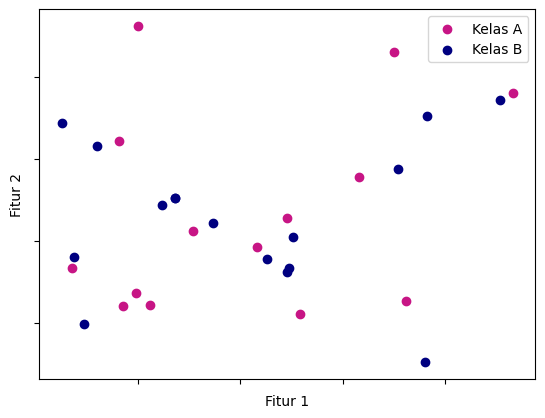

In [6]:
import matplotlib.pyplot as plt

# Define the color for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group by Label
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Feature 1'], y=class_a['Feature 2'], c=colors['class_a'])
plt.scatter(x=class_b['Feature 1'], y=class_b['Feature 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### Step 3 - Create Multinomial Naive Bayes Model

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Initiate the MultinomialNB object
mnb = MultinomialNB()

# We can use X and y from data dummy directly

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fitting model
# Label y should be in 1D arraylike form
mnb.fit(X_train, y_train)

# Make a prediction from train data
y_train_pred = mnb.predict(X_train)

# Make a prediction from test data
y_test_pred = mnb.predict(X_test)

### Step 4 - Model Evaluation

In [8]:
from sklearn.metrics import accuracy_score

# training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# testing accuracy
acc_test = accuracy_score(y_test, y_test_pred)

# Model evaluation on accuracy
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.4444444444444444


## Gaussian Naive Bayes Model

In [9]:
from sklearn.naive_bayes import GaussianNB

# Initiati GaussianNB object
gnb = GaussianNB()

# We will use the training and testing data from previous model

# Fit model
gnb.fit(X_train, y_train)

# Make a prediction using training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training data accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Make a prediction using testing data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate testing data accuracy
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print model evaluation
print(f'Train Accuracy (Gaussian): {acc_train_gnb}')
print(f'Test Accuracy (Gaussian): {acc_test_gnb}')

Train Accuracy (Gaussian): 0.7619047619047619
Test Accuracy (Gaussian): 0.2222222222222222


# 🌡️ Lab Work 2

Spam Messages Classification Using Multinomial Naive Bayes

In this work, we will use multinomial values to perform classification with Naive Bayes. Multinomial values are data obtained from counting processes. In the context of features, the multinomial value of a feature is based on the process of counting the probability of the occurrence of that feature in a dataset. A classic example of multinomial features is counting the number of words in text classification. In this experiment, a text classification case is provided to facilitate the understanding of the Multinomial Naive Bayes algorithm.

We will use the spam.csv data, which contains SMS text data labeled as spam and ham. Spam refers to spam messages, while ham refers to non-spam messages.

## Step 1 - Load Data

At this stage, we will load the data into a data frame and perform a simple inspection to determine whether we need to preprocess the data before feature extraction and modeling.

In [10]:
import numpy as np
import pandas as pd

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Check
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


There are 3 columns that are not useful for the subsequent process, so we need to drop those columns. Additionally, for ease of data readability, we will also rename the "v1" column as the label and the "v2" column as the SMS text.

## Step 2 - Preprocessing

Some of the tasks to be performed at this stage include:

Dropping unused columns.

Renaming columns "v1" (label) and "v2" (SMS text).

Data inspection.

Encoding labels.

Separating features from labels.

### Step 2.1 - Drop Unecessary Columns

In [11]:
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.2 - Rename Columns Name

In [12]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.3 - Data Inspection

In [13]:
# Check data per class
print(df['Labels'].value_counts())
print('\n')

# Check general information
print(df.info())
print('\n')

# Check Descriptive Statistic Information
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Step 2.4 - Label Encoding

In [14]:
# Prepare the labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode
df['Labels'] = df['Labels'].map(new_labels)

# Check
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Step 2.5 - Split Features and Labels

In [15]:
X = df['SMS'].values
y = df['Labels'].values

## Step 3 - Features Extraction

Feature extraction for each SMS will involve using the Bag of Words concept. We can use the CountVectorizer function from scikit-learn for this purpose. However, to prevent information leakage, we will first split the data and then perform the transformation on the training and testing data separately.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initaite CountVectorizer
bow = CountVectorizer()

# Fitting and transform X_train using CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Why just transform? The reason is the same as in the third experiment.
# We don't want the model to know the parameters used by CountVectorizer for fitting the X_train data.
# Thus, the testing data can remain unfamiliar to the model.
X_test = bow.transform(X_test)

Print the transformation result,

In [18]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training and Evaluation

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initiate MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Make a prediction using training data
y_pred_train = mnb.predict(X_train)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 0.9946152120260264
Testing Accuracy: 0.9775784753363229


# 🎯 Lab Work 3
Dummy Data Classification Using SVM

In this work, the model used is a simple generative model for determining labels on new data points. The case with dummy data illustrates two separate classes.

## Linear SVM

### Step 0 - Import Library

In [20]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Step 1 - Create Dummy Data

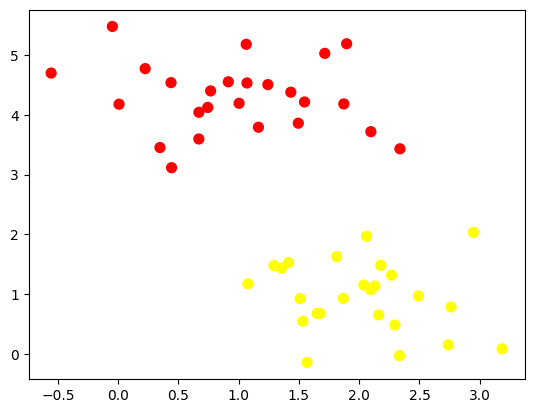

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Step 2 - Create Decision Boundaries

To create a classification model, a decision boundary between two formed class of data is needed. However, this condition still leaves cases where more than one separating boundary is required.

(-1.0, 3.5)

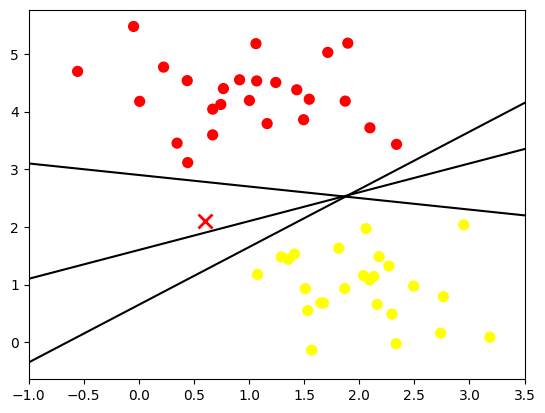

In [22]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

The presence of multiple decision boundaries indicates that there are several possibilities for a new data point to belong to a particular category. A new data point 'x' is situated in a different position from the data in the other two classes, causing this new data point not to fall into the categories of the previous two classes.

### Step 3 - Create Margins

The margin within a line can also be used to clarify the position of a data point with respect to the label.

(-1.0, 3.5)

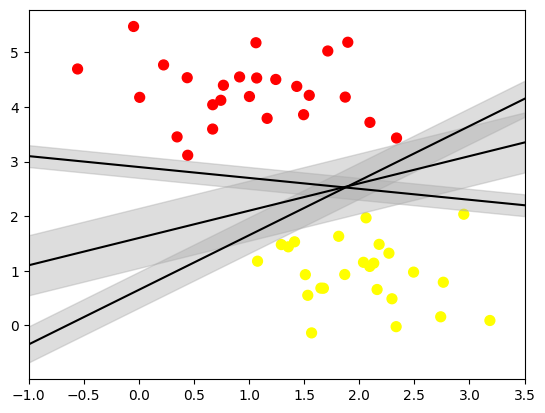

In [23]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

The margin used in SVM serves to indicate the most optimal model. This optimal criterion is obtained by determining which line can maximize the existing margin.

### Step 4 - Model Fitting

The previous step shows how SVM classifier works. In this step, we will use scikit-learn to create a SVM model.

In [24]:
from sklearn.svm import SVC # "Support vector classifier"

# Initaite SVC object
model = SVC(kernel='linear', C=1E10)

# Fitting
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

#### Step 4.1 - Visualize Fitting Model

In [25]:
# create a function to plot decision boundary

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Call the function,

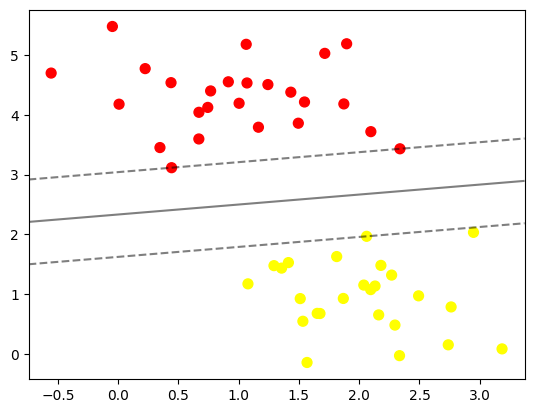

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Several data points that touch (enter) the area around the line are referred to as support vectors.

In order to know which point used as support vector basis, you can use this following code,

model.support_vectors_

The fitting result is key to the success of a classifier (which is solely determined by the position of the support vectors). Other data points that are far from the margin and remain within the correct area do not have the ability to modify the fitting (because they are not support vectors). These data points do not contribute to the loss function used for fitting the model. To better understand this, 60 and 120 initial data points are used as examples for comparison.

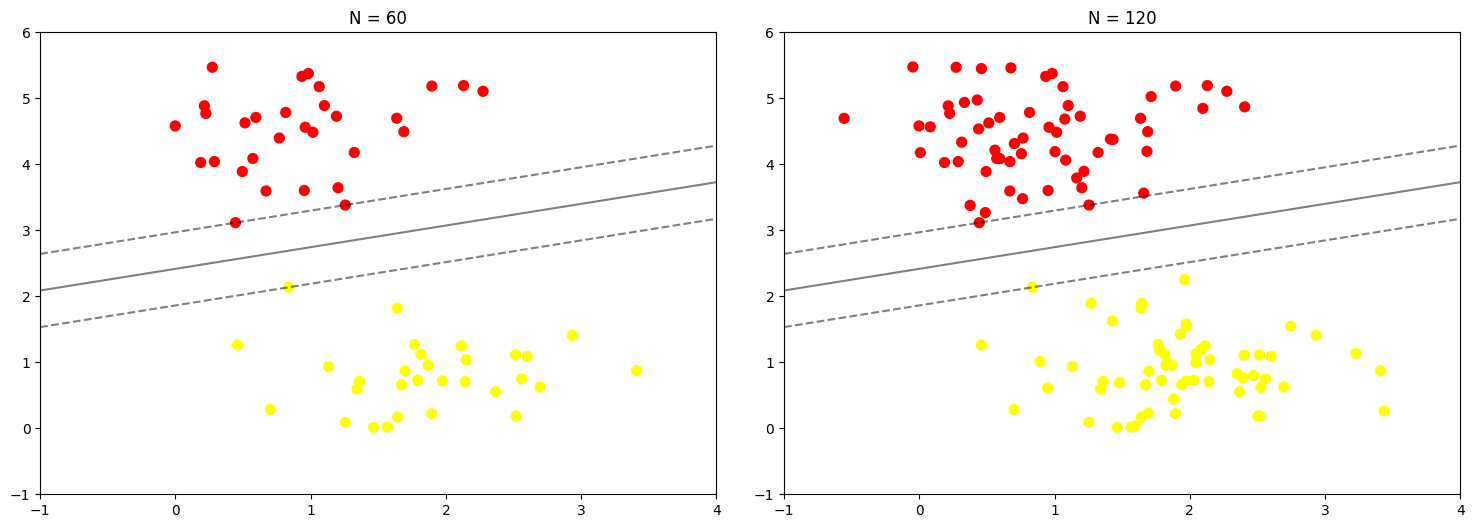

In [27]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Non-Linear SVM
Non-linearly separable data poses a challenge for SVM models. Therefore, kernels become a necessity for SVM to fit non-linear relationships with a linear classifier. In this section, we will learn how to make no-linear SVM classifier.

### Step 1 - Create Dummy Data

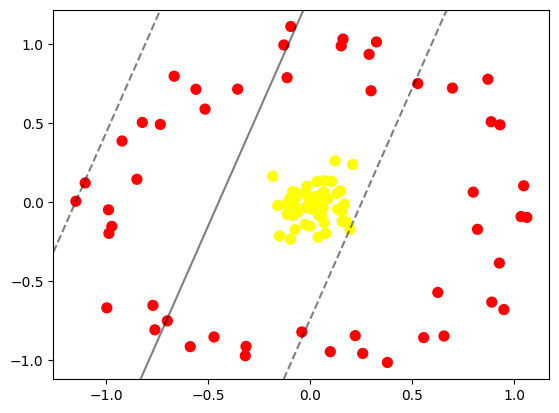

In [31]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Step 2 - Fitting Model

In [35]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

#### Step 2.1 - Visualize Decision Boundary

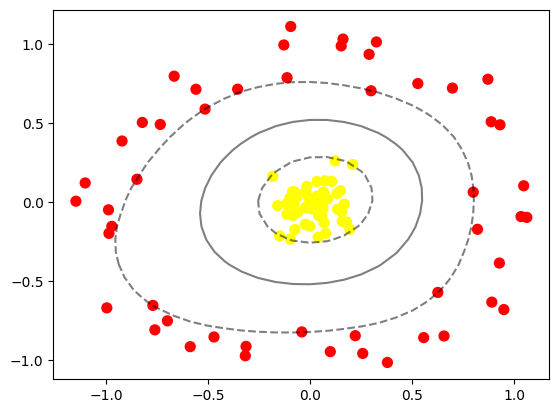

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Case on Overlapping Data
For example, we have this kind of data,

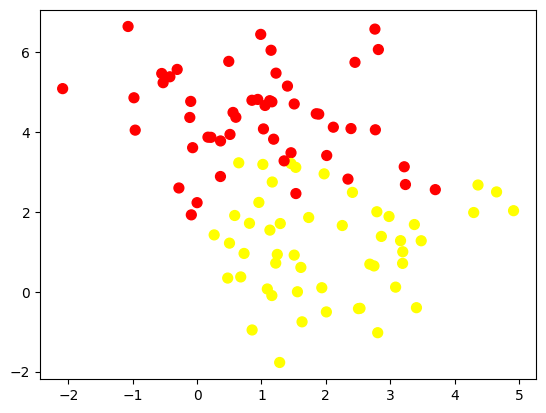

In [37]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To address this, margin smoothing techniques in SVM can be applied. This technique involves incorporating some data points into the margin to achieve a better fit. The widening of the margin resulting from smoothing techniques is controlled by a tuning parameter (known as C). The example below demonstrates how changes in C can impact the final fitting result.

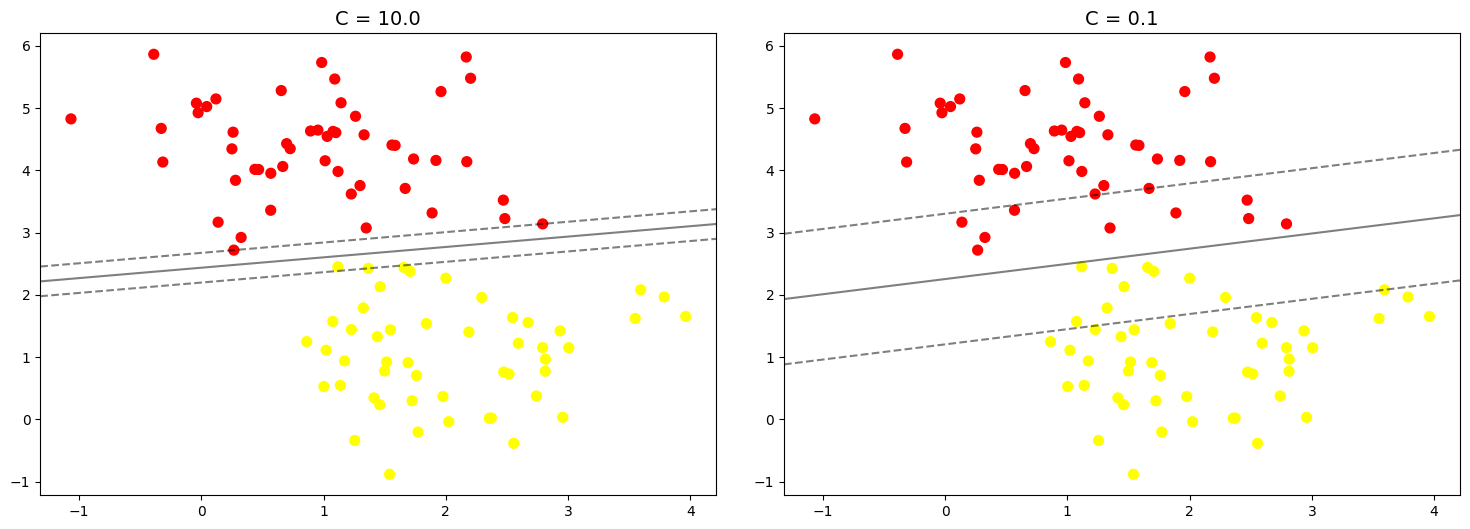

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

It's important to note that the optimal value of C depends on each dataset and is typically determined through cross-validation or similar procedures.

# 🖼️ Lab Work 4
Images Classification Using SVM

In this work, we will build SVM classifier to classify image data

### Step 1 - Download The Dataset

In [39]:
from sklearn.datasets import fetch_lfw_people

# Store data in 'faces'
faces = fetch_lfw_people(min_faces_per_person=60)

# Check the dataset
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


### Step 2 - Visualize The Data

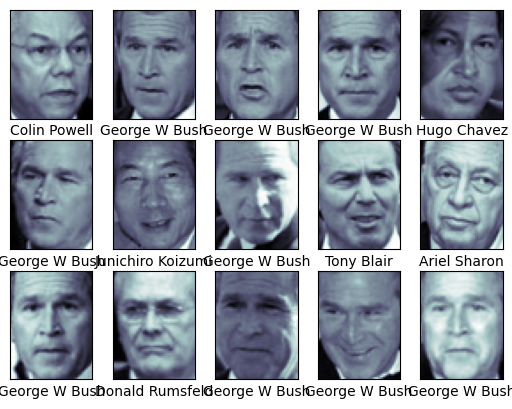

In [40]:
# We will plot some of the data

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Step 3 - Dimensional Reduction and Model Initiation

In [41]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Notes that our image size is 62*47=2914
# PCA reduce its dimension to 150
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Intiate the SVM model
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline -> Dimensional reduction followed by model fitting
model = make_pipeline(pca, svc)

### Step 4 - Split Data

In [42]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Step 5 - Perform Grid Search

Grid search is a method to find the best hyperparameters of machine learning model that used during training.

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 1min 40s, sys: 25.8 s, total: 2min 6s
Wall time: 1min 28s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


### Step 6 - Evaluate The Test Set

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### Step 7 - Visualize The Prediction

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

### Step 8 - Evaluate The Model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

Check the confusion matrix,

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# 😍 Lab Assignment